# Credit Card Fraud Prediction

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline


In [22]:
df = pd.read_csv('dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [27]:
legit_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

In [28]:
legit_df.shape

(284315, 31)

In [29]:
fraud_df.shape

(492, 31)

In [30]:
legit_sample = legit_df.sample(n=500, random_state = 42)
legit_sample.shape

(500, 31)

In [31]:
final_df = pd.concat([legit_sample,fraud_df])
final_df.shape

(992, 31)

In [32]:
for col in final_df.select_dtypes(include = ['number']).columns:
    q1 = final_df[col].quantile(0.25)
    q3 = final_df[col].quantile(0.75)

    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    final_df[col] = final_df[col].clip(lower = lower_bound, upper = upper_bound)

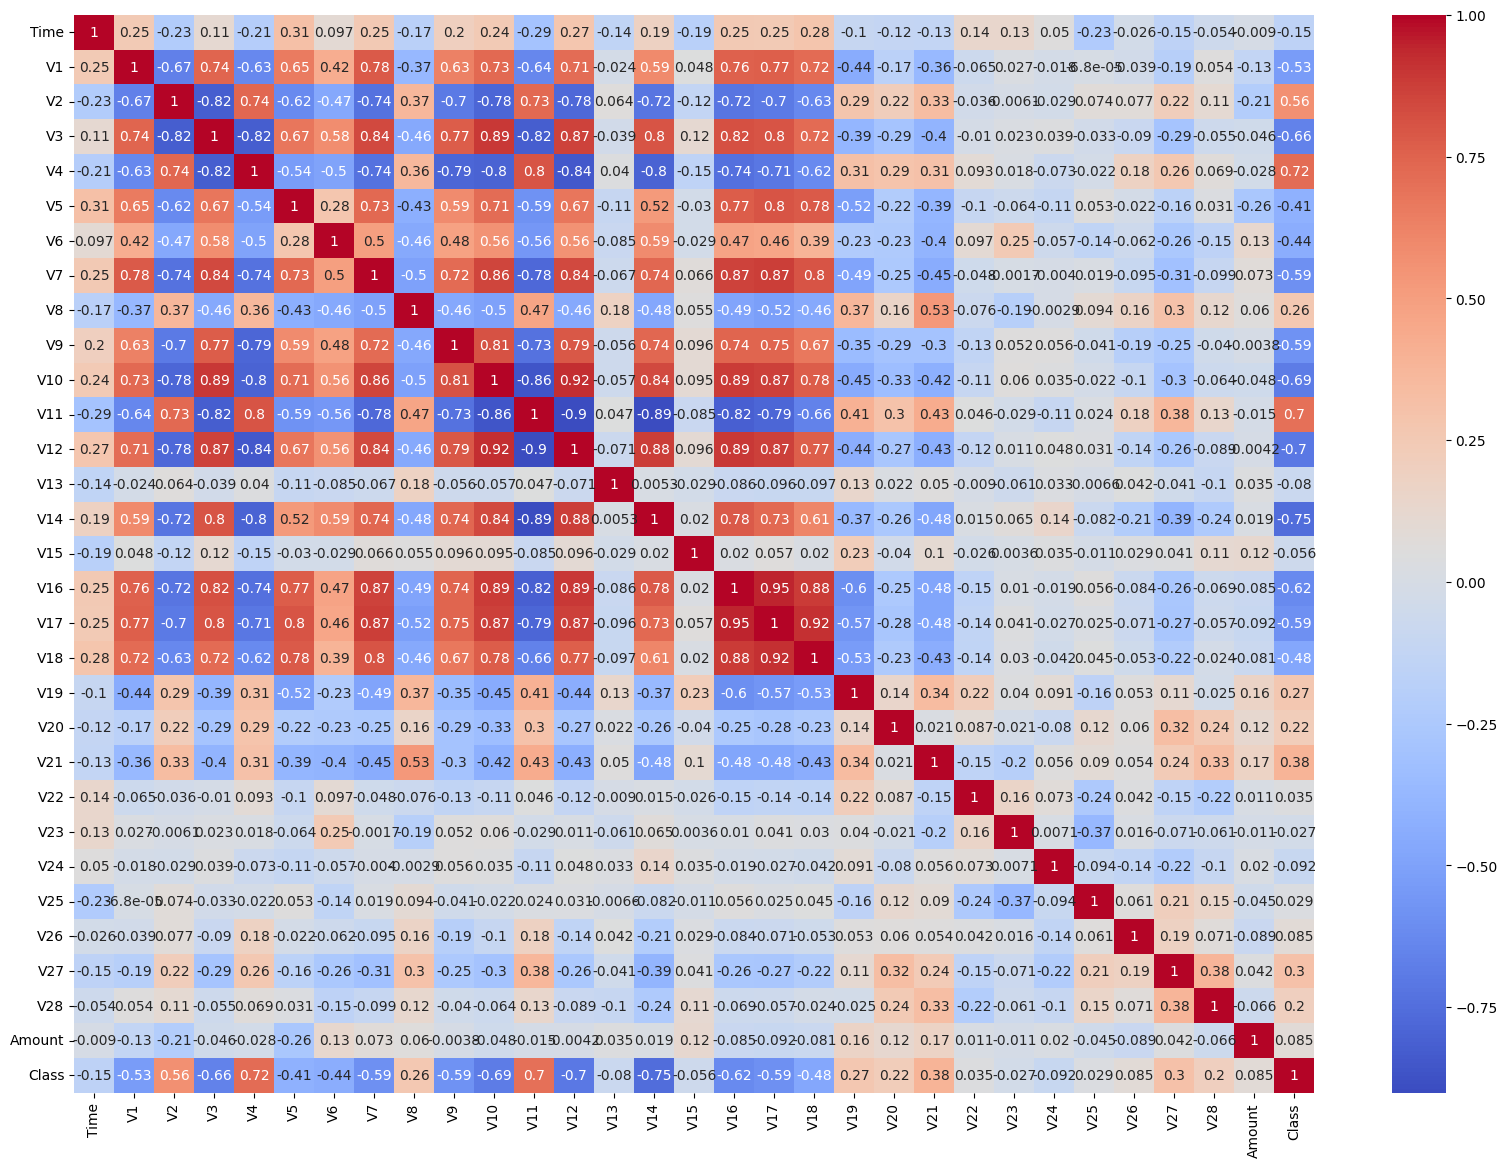

In [33]:
corr_mat = final_df.corr()
plt.figure(figsize = (20,14))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [34]:
print(final_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [35]:
X = final_df.drop(['Class', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28' ],axis = 1)
y = final_df['Class']
columns=X.columns

from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()

X_scaled = mc.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=columns)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Amount
0,0.478360,0.904868,0.438552,0.764134,0.344281,0.603820,0.443991,0.632694,0.361239,0.592990,...,0.523471,0.778903,0.695475,0.794643,0.698231,0.618671,0.426663,0.425032,0.374107,0.003062
1,0.292389,0.711073,0.488860,0.861399,0.342836,0.594585,0.565706,0.640676,0.459409,0.530963,...,0.499121,0.858926,0.572070,0.745063,0.642124,0.669674,0.611090,0.416088,0.487870,0.016841
2,0.319041,0.748448,0.367786,0.874866,0.211115,0.498940,0.615223,0.550868,0.421169,0.346423,...,0.697594,0.814119,0.624498,0.684812,0.693489,0.704730,0.846276,0.472625,0.385350,0.060434
3,0.677309,0.778787,0.478705,0.744272,0.295222,0.589834,0.410312,0.661723,0.458393,0.591252,...,0.375088,0.809285,0.650901,0.767558,0.701793,0.692806,0.416715,0.382089,0.534673,0.229649
4,0.524911,0.953830,0.420164,0.822071,0.551391,0.580000,0.760429,0.549319,0.481610,0.673539,...,0.832809,0.895810,0.085299,0.852601,0.645261,0.679376,0.145282,0.338606,0.457727,0.000000


In [36]:

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [37]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "SGD Classifier": SGDClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    results.append((name, acc, prec, rec, f1))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

results_df.head()

c:\Users\aakar\OneDrive\Documents\GitHub\credit-card-fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:08:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1 Score
0,CatBoost,0.944724,0.946846,0.944724,0.944606
1,Random Forest,0.944724,0.950105,0.944724,0.944476
2,MLP Classifier,0.934673,0.935020,0.934673,0.934634
3,Logistic Regression,0.934673,0.938127,0.934673,0.934464
4,SGD Classifier,0.934673,0.938127,0.934673,0.934464


In [38]:
catboost_params = {
    'classifier__iterations': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__depth': [4, 6, 8, 10],
    'classifier__l2_leaf_reg': [1, 3, 5, 7],
    'classifier__border_count': [32, 64, 128]  # number of splits
}

# CatBoost pipeline
catboost_pipeline = Pipeline([
    ('classifier', CatBoostClassifier(verbose=0, random_state=42))
])


# GridSearchCV with f1_weighted scoring
catboost_search = GridSearchCV(
    catboost_pipeline,
    param_grid=catboost_params,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Fit and evaluate
catboost_search.fit(x_train, y_train)
catboost_predict = catboost_search.predict(x_test)

# Final test F1 score
f1 = f1_score(y_test, catboost_predict, average='weighted')
print("F1 Score on Test Set:", f1)
print("Best CatBoost Params:", catboost_search.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
F1 Score on Test Set: 0.9395394501417618
Best CatBoost Params: {'classifier__border_count': 64, 'classifier__depth': 8, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.1}
F1 Score on Test Set: 0.9395394501417618
Best CatBoost Params: {'classifier__border_count': 64, 'classifier__depth': 8, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.1}


In [39]:
# Expanded XGBoost parameter grid
xgb_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0],
    'classifier__gamma': [0, 1, 5]
}

# Define pipeline
xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])
xgb_search = GridSearchCV(
    xgb_pipeline,
    param_grid=xgb_params,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Fit and evaluate
xgb_search.fit(x_train, y_train)
xgb_predict = xgb_search.predict(x_test)

# Final F1 score on test set
f1 = f1_score(y_test, xgb_predict, average='weighted')
print("F1 Score on Test Set:", f1)
print("Best XGB Params:", xgb_search.best_params_)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
F1 Score on Test Set: 0.9346337118478042
Best XGB Params: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}
F1 Score on Test Set: 0.9346337118478042
Best XGB Params: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}


c:\Users\aakar\OneDrive\Documents\GitHub\credit-card-fraud-detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
X_submission = df.drop(['Class', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis =1)
y_submission = df['Class']

columns=X_submission.columns
X_scaled_sub = mc.fit_transform(X_submission)
X_submission = pd.DataFrame(X_scaled_sub, columns=columns)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the full dataset
y_submission_pred = catboost_search.predict(X_submission)

# Calculate all metrics
accuracy = accuracy_score(y_submission, y_submission_pred)
precision = precision_score(y_submission, y_submission_pred, average='weighted')
recall = recall_score(y_submission, y_submission_pred, average='weighted')
f1_weighted = f1_score(y_submission, y_submission_pred, average='weighted')

# Also calculate binary metrics (for fraud class specifically)
precision_fraud = precision_score(y_submission, y_submission_pred, pos_label=1)
recall_fraud = recall_score(y_submission, y_submission_pred, pos_label=1)
f1_fraud = f1_score(y_submission, y_submission_pred, pos_label=1)

print("=== Model Performance on Full Dataset ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")
print()
print("=== Fraud Detection Specific Metrics ===")
print(f"Precision (Fraud Class): {precision_fraud:.4f}")
print(f"Recall (Fraud Class): {recall_fraud:.4f}")
print(f"F1 Score (Fraud Class): {f1_fraud:.4f}")
print()

# Confusion Matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_submission, y_submission_pred)
print(f"True Negatives (Legitimate correctly predicted): {cm[0][0]}")
print(f"False Positives (Legitimate predicted as Fraud): {cm[0][1]}")
print(f"False Negatives (Fraud predicted as Legitimate): {cm[1][0]}")
print(f"True Positives (Fraud correctly predicted): {cm[1][1]}")
print()

# Classification Report
print("=== Detailed Classification Report ===")
print(classification_report(y_submission, y_submission_pred, target_names=['Legitimate', 'Fraud']))

=== Model Performance on Full Dataset ===
Accuracy: 0.2984
Precision (Weighted): 0.9981
Recall (Weighted): 0.2984
F1 Score (Weighted): 0.4575

=== Fraud Detection Specific Metrics ===
Precision (Fraud Class): 0.0024
Recall (Fraud Class): 0.9715
F1 Score (Fraud Class): 0.0048

=== Confusion Matrix ===
True Negatives (Legitimate correctly predicted): 84510
False Positives (Legitimate predicted as Fraud): 199805
False Negatives (Fraud predicted as Legitimate): 14
True Positives (Fraud correctly predicted): 478

=== Detailed Classification Report ===
              precision    recall  f1-score   support

  Legitimate       1.00      0.30      0.46    284315
       Fraud       0.00      0.97      0.00       492

    accuracy                           0.30    284807
   macro avg       0.50      0.63      0.23    284807
weighted avg       1.00      0.30      0.46    284807

